# 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns 

In [2]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

# KOSPI 200 지수 데이터 전처리 & 시각화

In [25]:
file_path = "data\kospi200_origin.csv"
df_kospi = pd.read_csv(file_path, encoding="cp949")
df_kospi.shape

(2895, 10)

In [ ]:
df_kospi.head()

In [ ]:
df_kospi.tail()

In [ ]:
df_kospi.info()

In [ ]:
# 결측치 확인 : 없음
df_kospi.isnull().sum()

In [ ]:
df_kospi.describe()

## 데이터 타입 변경

### 일자를 연도, 월, 일, 요일로 분리하기

In [26]:
df_kospi["일자"] = pd.to_datetime(df_kospi["일자"])
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      2895 non-null   datetime64[ns]
 1   종가      2895 non-null   float64       
 2   대비      2895 non-null   float64       
 3   등락률     2895 non-null   float64       
 4   시가      2895 non-null   float64       
 5   고가      2895 non-null   float64       
 6   저가      2895 non-null   float64       
 7   거래량     2895 non-null   float64       
 8   거래대금    2895 non-null   float64       
 9   상장시가총액  2895 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 226.3 KB


In [27]:
df_kospi["연도"] = df_kospi["일자"].dt.year
df_kospi["월"] = df_kospi["일자"].dt.month
df_kospi["일"] = df_kospi["일자"].dt.day
df_kospi["요일"] = df_kospi["일자"].dt.dayofweek
df_kospi["요일명"] = df_kospi["요일"].map(lambda x : "월화수목금토일"[x])
df_kospi.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명
0,2022-09-30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09,2022,9,30,4,금
1,2022-09-29,282.65,-0.54,-0.19,286.60,287.81,282.56,128427.0,5584454.0,1.496674e+09,2022,9,29,3,목
2,2022-09-28,283.19,-7.01,-2.42,287.66,289.75,280.80,160839.0,6903850.0,1.495226e+09,2022,9,28,2,수
3,2022-09-27,290.20,0.43,0.15,290.27,290.75,286.76,152310.0,6310896.0,1.532256e+09,2022,9,27,1,화
4,2022-09-26,289.77,-7.97,-2.68,293.65,293.96,289.01,177692.0,7088012.0,1.530092e+09,2022,9,26,0,월


In [28]:
df_kospi["연도월"] = df_kospi["연도"].astype(str) + "."+ df_kospi["월"].astype(str)
df_kospi.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월
0,2022-09-30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09,2022,9,30,4,금,2022.9
1,2022-09-29,282.65,-0.54,-0.19,286.60,287.81,282.56,128427.0,5584454.0,1.496674e+09,2022,9,29,3,목,2022.9
2,2022-09-28,283.19,-7.01,-2.42,287.66,289.75,280.80,160839.0,6903850.0,1.495226e+09,2022,9,28,2,수,2022.9
3,2022-09-27,290.20,0.43,0.15,290.27,290.75,286.76,152310.0,6310896.0,1.532256e+09,2022,9,27,1,화,2022.9
4,2022-09-26,289.77,-7.97,-2.68,293.65,293.96,289.01,177692.0,7088012.0,1.530092e+09,2022,9,26,0,월,2022.9


In [29]:
df_kospi["분기"] = df_kospi["일자"].dt.quarter.astype(str)
df_kospi.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월,분기
0,2022-09-30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09,2022,9,30,4,금,2022.9,3
1,2022-09-29,282.65,-0.54,-0.19,286.60,287.81,282.56,128427.0,5584454.0,1.496674e+09,2022,9,29,3,목,2022.9,3
2,2022-09-28,283.19,-7.01,-2.42,287.66,289.75,280.80,160839.0,6903850.0,1.495226e+09,2022,9,28,2,수,2022.9,3
3,2022-09-27,290.20,0.43,0.15,290.27,290.75,286.76,152310.0,6310896.0,1.532256e+09,2022,9,27,1,화,2022.9,3
4,2022-09-26,289.77,-7.97,-2.68,293.65,293.96,289.01,177692.0,7088012.0,1.530092e+09,2022,9,26,0,월,2022.9,3


In [31]:
df_kospi[["거래량", "거래대금", "상장시가총액"]] = df_kospi[["거래량", "거래대금", "상장시가총액"]].astype(int)
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      2895 non-null   datetime64[ns]
 1   종가      2895 non-null   float64       
 2   대비      2895 non-null   float64       
 3   등락률     2895 non-null   float64       
 4   시가      2895 non-null   float64       
 5   고가      2895 non-null   float64       
 6   저가      2895 non-null   float64       
 7   거래량     2895 non-null   int32         
 8   거래대금    2895 non-null   int32         
 9   상장시가총액  2895 non-null   int32         
 10  연도      2895 non-null   int64         
 11  월       2895 non-null   int64         
 12  일       2895 non-null   int64         
 13  요일      2895 non-null   int64         
 14  요일명     2895 non-null   object        
 15  연도월     2895 non-null   object        
 16  분기      2895 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(3), int64(4)

## 파일로 저장

In [32]:
df_kospi = df_kospi.sort_values("일자").reset_index(drop=True)
df_kospi.to_csv("data\KOSPI200.csv", index=False)

In [33]:
pd.read_csv("data\KOSPI200.csv")

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월,분기
0,2011-01-03,273.81,2.62,0.97,272.84,273.81,271.63,100076,4872100,1005699476,2011,1,3,0,월,2011.1,1
1,2011-01-04,275.78,1.97,0.72,274.29,275.78,273.69,113809,6121661,1012702568,2011,1,4,1,화,2011.1,1
2,2011-01-05,275.35,-0.43,-0.16,275.37,275.94,274.57,127214,6860693,1011270305,2011,1,5,2,수,2011.1,1
3,2011-01-06,274.72,-0.63,-0.23,276.91,277.13,273.08,143227,6960295,1009445006,2011,1,6,3,목,2011.1,1
4,2011-01-07,275.61,0.89,0.32,274.00,275.61,273.24,113105,6131209,1013763300,2011,1,7,4,금,2011.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2022-09-26,289.77,-7.97,-2.68,293.65,293.96,289.01,177692,7088012,1530092350,2022,9,26,0,월,2022.9,3
2891,2022-09-27,290.20,0.43,0.15,290.27,290.75,286.76,152310,6310896,1532256479,2022,9,27,1,화,2022.9,3
2892,2022-09-28,283.19,-7.01,-2.42,287.66,289.75,280.80,160839,6903850,1495225781,2022,9,28,2,수,2022.9,3
2893,2022-09-29,282.65,-0.54,-0.19,286.60,287.81,282.56,128427,5584454,1496674215,2022,9,29,3,목,2022.9,3


## 시각화

### 수치변수 히스토그램

In [ ]:
df_kospi.hist(bins=100, figsize=(15, 10));

### 종가

In [ ]:
df_kospi["종가"].plot(figsize=(20, 5))

In [ ]:
df_kospi.pivot_table(index="연도", values="종가").plot(figsize=(20, 5))

### 금융차트

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df_kospi.index,
                open=df_kospi["시가"],
                high=df_kospi["고가"],
                low=df_kospi["저가"],
                close=df_kospi["종가"])])

fig.show()

In [ ]:
fig = go.Figure(data=[go.Ohlc(x=df_kospi.index,
                open=df_kospi["시가"],
                high=df_kospi["고가"],
                low=df_kospi["저가"],
                close=df_kospi["종가"])])

fig.show()

### 거래량

In [ ]:
fig = px.bar(df_kospi, y="거래량")
fig.show()

In [ ]:
fig = px.bar(df_kospi, x="연도", y="거래량")
fig.show()

### 거래대금

In [ ]:
fig = px.bar(df_kospi, y="거래대금")
fig.show()

In [ ]:
fig = px.bar(df_kospi, x="연도", y="거래대금")
fig.show()

### 상관관계

In [44]:
corr = df_kospi.corr()

In [45]:
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

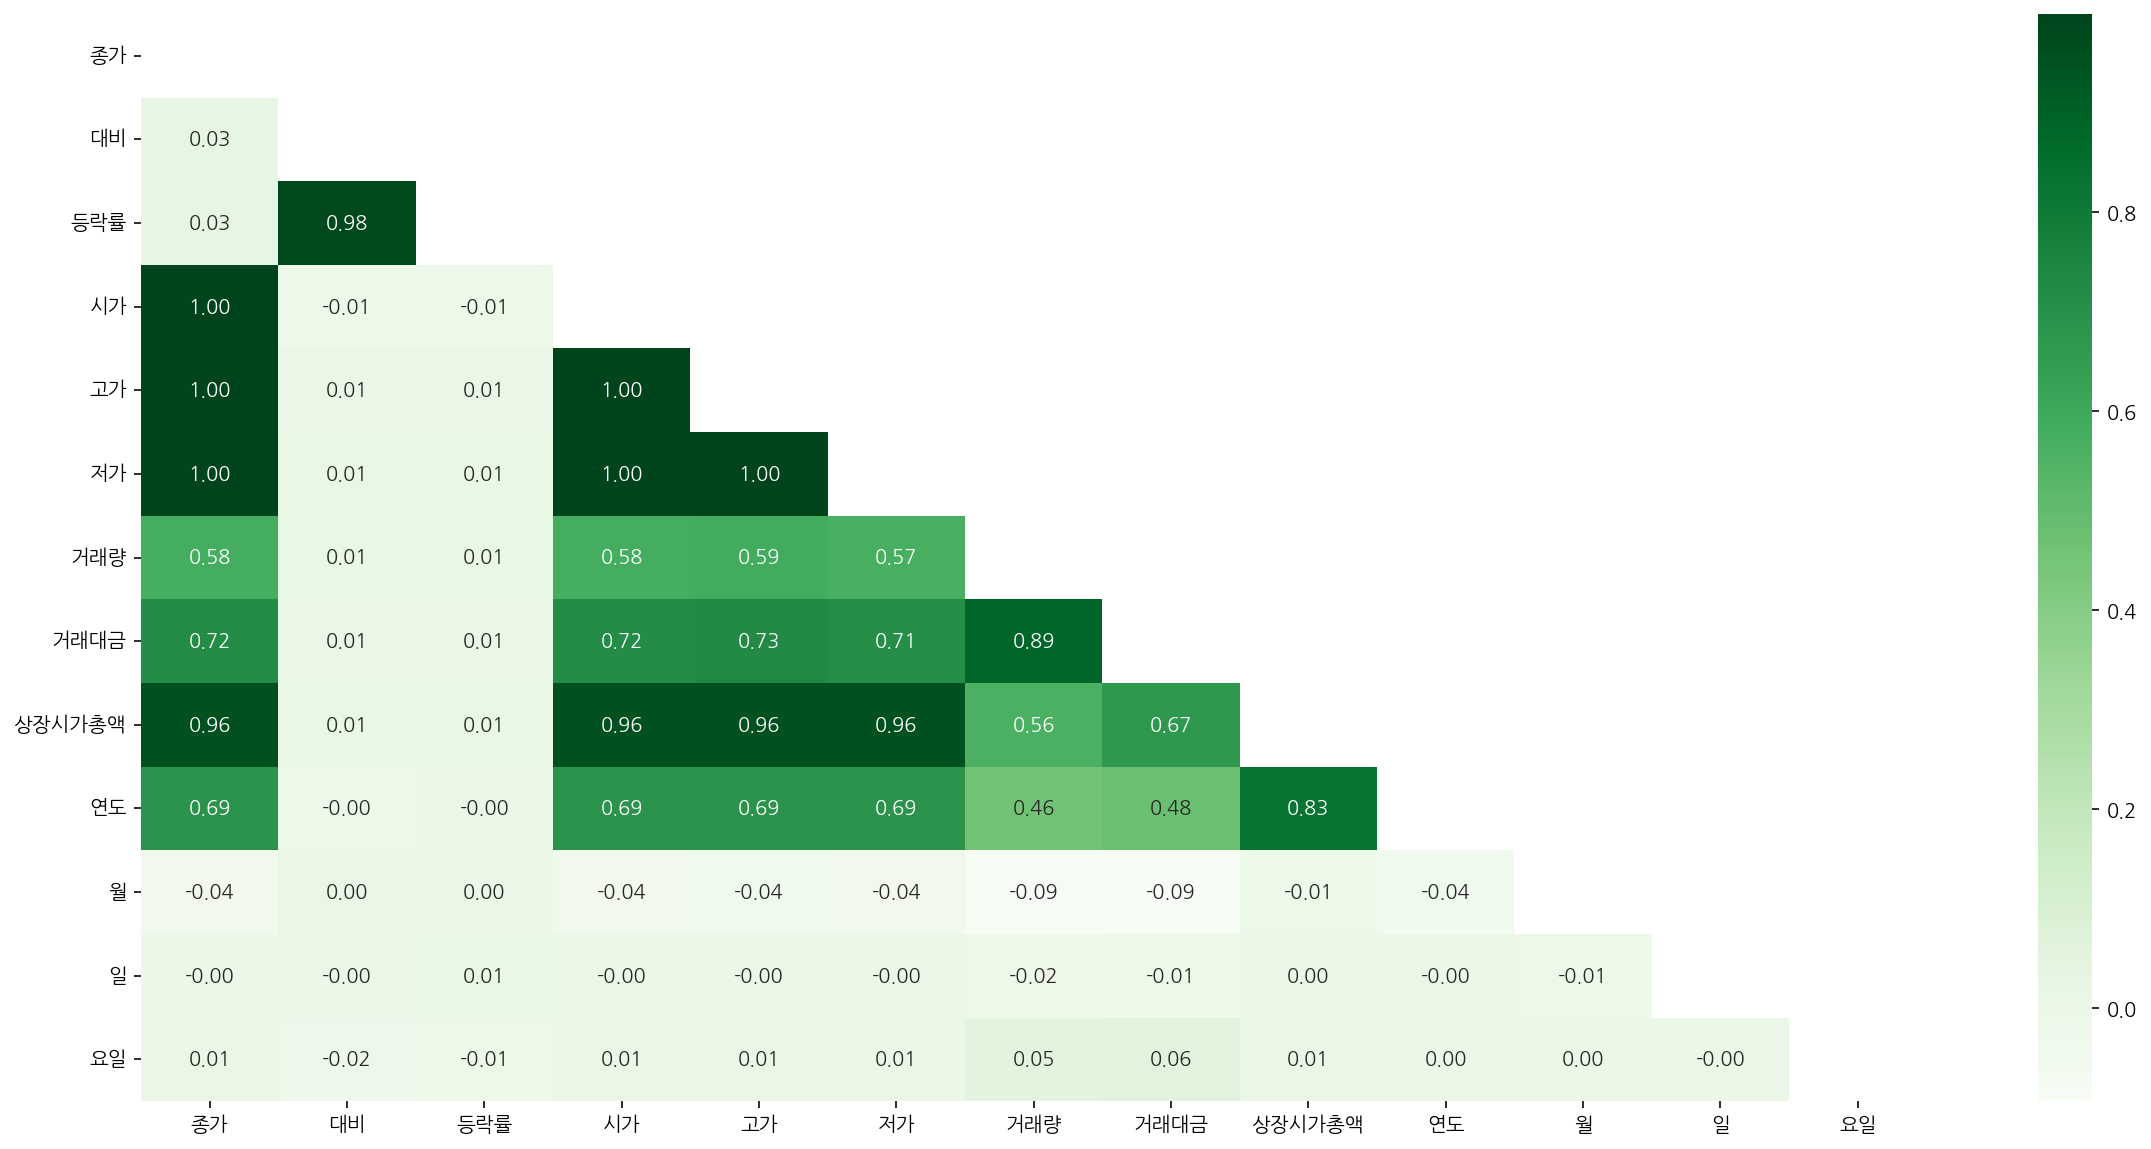

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr ,annot=True ,fmt='.2f' , cmap='Greens' ,mask=mask)

# KOSPI 200의 ESG지수 데이터 전처리 & 시각화

## 데이터 불러오기 및 정보 확인

In [11]:
file_path = "data\kospi200_esg_origin.csv"
df_esg = pd.read_csv(file_path, encoding="cp949")
df_esg.shape

(2658, 10)

In [ ]:
df_esg.head()

In [ ]:
df_esg.tail()

In [ ]:
# 2022년 9월 30일까지의 데이터로 분석하기로 결정
df_esg = df_esg.iloc[11:]
df_esg.head()

In [ ]:
# df_esg의 요약 정보 확인

df_esg.info()

In [ ]:
# df_esg의 결측치 개수 확인
df_esg.isnull().sum()

In [ ]:
df_esg.describe()

In [ ]:
# df_esg의 결측치 시각화
sns.heatmap(df_esg.isnull(), cmap="gray");

## 데이터 타입 변경

### 일자를 연도, 월, 일, 요일로 분리하기

In [12]:
df_esg["일자"] = pd.to_datetime(df_esg["일자"]) 
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      2658 non-null   datetime64[ns]
 1   종가      2658 non-null   float64       
 2   대비      2657 non-null   float64       
 3   등락률     2657 non-null   float64       
 4   시가      941 non-null    float64       
 5   고가      941 non-null    float64       
 6   저가      941 non-null    float64       
 7   거래량     941 non-null    float64       
 8   거래대금    941 non-null    float64       
 9   상장시가총액  941 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 207.8 KB


In [13]:
# 일자의 파생변수 만들기
df_esg["연도"] = df_esg["일자"].dt.year
df_esg["월"] = df_esg["일자"].dt.month
df_esg["일"] = df_esg["일자"].dt.day
df_esg["요일"] = df_esg["일자"].dt.dayofweek
df_esg["요일명"] = df_esg["요일"].map(lambda x : "월화수목금토일"[x])
df_esg.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명
0,2022-10-19,320.42,-1.56,-0.48,321.95,323.97,320.39,51196.0,2830203.0,1.142319e+09,2022,10,19,2,수
1,2022-10-18,321.98,3.61,1.13,322.33,322.85,317.94,84584.0,4311059.0,1.147529e+09,2022,10,18,1,화
2,2022-10-17,318.37,0.57,0.18,314.16,318.95,313.39,78423.0,3706462.0,1.135169e+09,2022,10,17,0,월
3,2022-10-14,317.80,7.28,2.34,315.97,318.80,314.85,95503.0,3695718.0,1.131227e+09,2022,10,14,4,금
4,2022-10-13,310.52,-4.29,-1.36,313.76,314.34,310.52,91395.0,3958385.0,1.106515e+09,2022,10,13,3,목


In [14]:
df_esg["연도월"] = df_esg["연도"].astype(str) + "." + df_esg["월"].astype(str)
df_esg.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월
0,2022-10-19,320.42,-1.56,-0.48,321.95,323.97,320.39,51196.0,2830203.0,1.142319e+09,2022,10,19,2,수,2022.10
1,2022-10-18,321.98,3.61,1.13,322.33,322.85,317.94,84584.0,4311059.0,1.147529e+09,2022,10,18,1,화,2022.10
2,2022-10-17,318.37,0.57,0.18,314.16,318.95,313.39,78423.0,3706462.0,1.135169e+09,2022,10,17,0,월,2022.10
3,2022-10-14,317.80,7.28,2.34,315.97,318.80,314.85,95503.0,3695718.0,1.131227e+09,2022,10,14,4,금,2022.10
4,2022-10-13,310.52,-4.29,-1.36,313.76,314.34,310.52,91395.0,3958385.0,1.106515e+09,2022,10,13,3,목,2022.10


In [15]:
df_esg["분기"] = df_esg['일자'].dt.quarter
df_esg.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월,분기
0,2022-10-19,320.42,-1.56,-0.48,321.95,323.97,320.39,51196.0,2830203.0,1.142319e+09,2022,10,19,2,수,2022.10,4
1,2022-10-18,321.98,3.61,1.13,322.33,322.85,317.94,84584.0,4311059.0,1.147529e+09,2022,10,18,1,화,2022.10,4
2,2022-10-17,318.37,0.57,0.18,314.16,318.95,313.39,78423.0,3706462.0,1.135169e+09,2022,10,17,0,월,2022.10,4
3,2022-10-14,317.80,7.28,2.34,315.97,318.80,314.85,95503.0,3695718.0,1.131227e+09,2022,10,14,4,금,2022.10,4
4,2022-10-13,310.52,-4.29,-1.36,313.76,314.34,310.52,91395.0,3958385.0,1.106515e+09,2022,10,13,3,목,2022.10,4


In [16]:
# 일자를 오래된 순으로 정렬
df_esg = df_esg.sort_values("일자").reset_index(drop=True)
df_esg.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월,분기
0,2012-01-02,238.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,2,0,월,2012.1,1
1,2012-01-03,245.89,7.19,3.01,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,3,1,화,2012.1,1
2,2012-01-04,244.07,-1.82,-0.74,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,4,2,수,2012.1,1
3,2012-01-05,243.52,-0.55,-0.23,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,5,3,목,2012.1,1
4,2012-01-06,240.56,-2.96,-1.22,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,6,4,금,2012.1,1


## 파일로 저장

In [17]:
df_esg.to_csv('data\KOSPI200_ESG.csv', index=False)

In [18]:
# 확인하기
pd.read_csv('data\KOSPI200_ESG.csv')

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,연도,월,일,요일,요일명,연도월,분기
0,2012-01-02,238.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,2,0,월,2012.1,1
1,2012-01-03,245.89,7.19,3.01,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,3,1,화,2012.1,1
2,2012-01-04,244.07,-1.82,-0.74,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,4,2,수,2012.1,1
3,2012-01-05,243.52,-0.55,-0.23,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,5,3,목,2012.1,1
4,2012-01-06,240.56,-2.96,-1.22,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,6,4,금,2012.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2022-10-13,310.52,-4.29,-1.36,313.76,314.34,310.52,91395.0,3958385.0,1.106515e+09,2022,10,13,3,목,2022.1,4
2654,2022-10-14,317.80,7.28,2.34,315.97,318.80,314.85,95503.0,3695718.0,1.131227e+09,2022,10,14,4,금,2022.1,4
2655,2022-10-17,318.37,0.57,0.18,314.16,318.95,313.39,78423.0,3706462.0,1.135169e+09,2022,10,17,0,월,2022.1,4
2656,2022-10-18,321.98,3.61,1.13,322.33,322.85,317.94,84584.0,4311059.0,1.147529e+09,2022,10,18,1,화,2022.1,4


## 시각화

### 상관관계

In [47]:
corr = df_esg.corr()

In [48]:
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

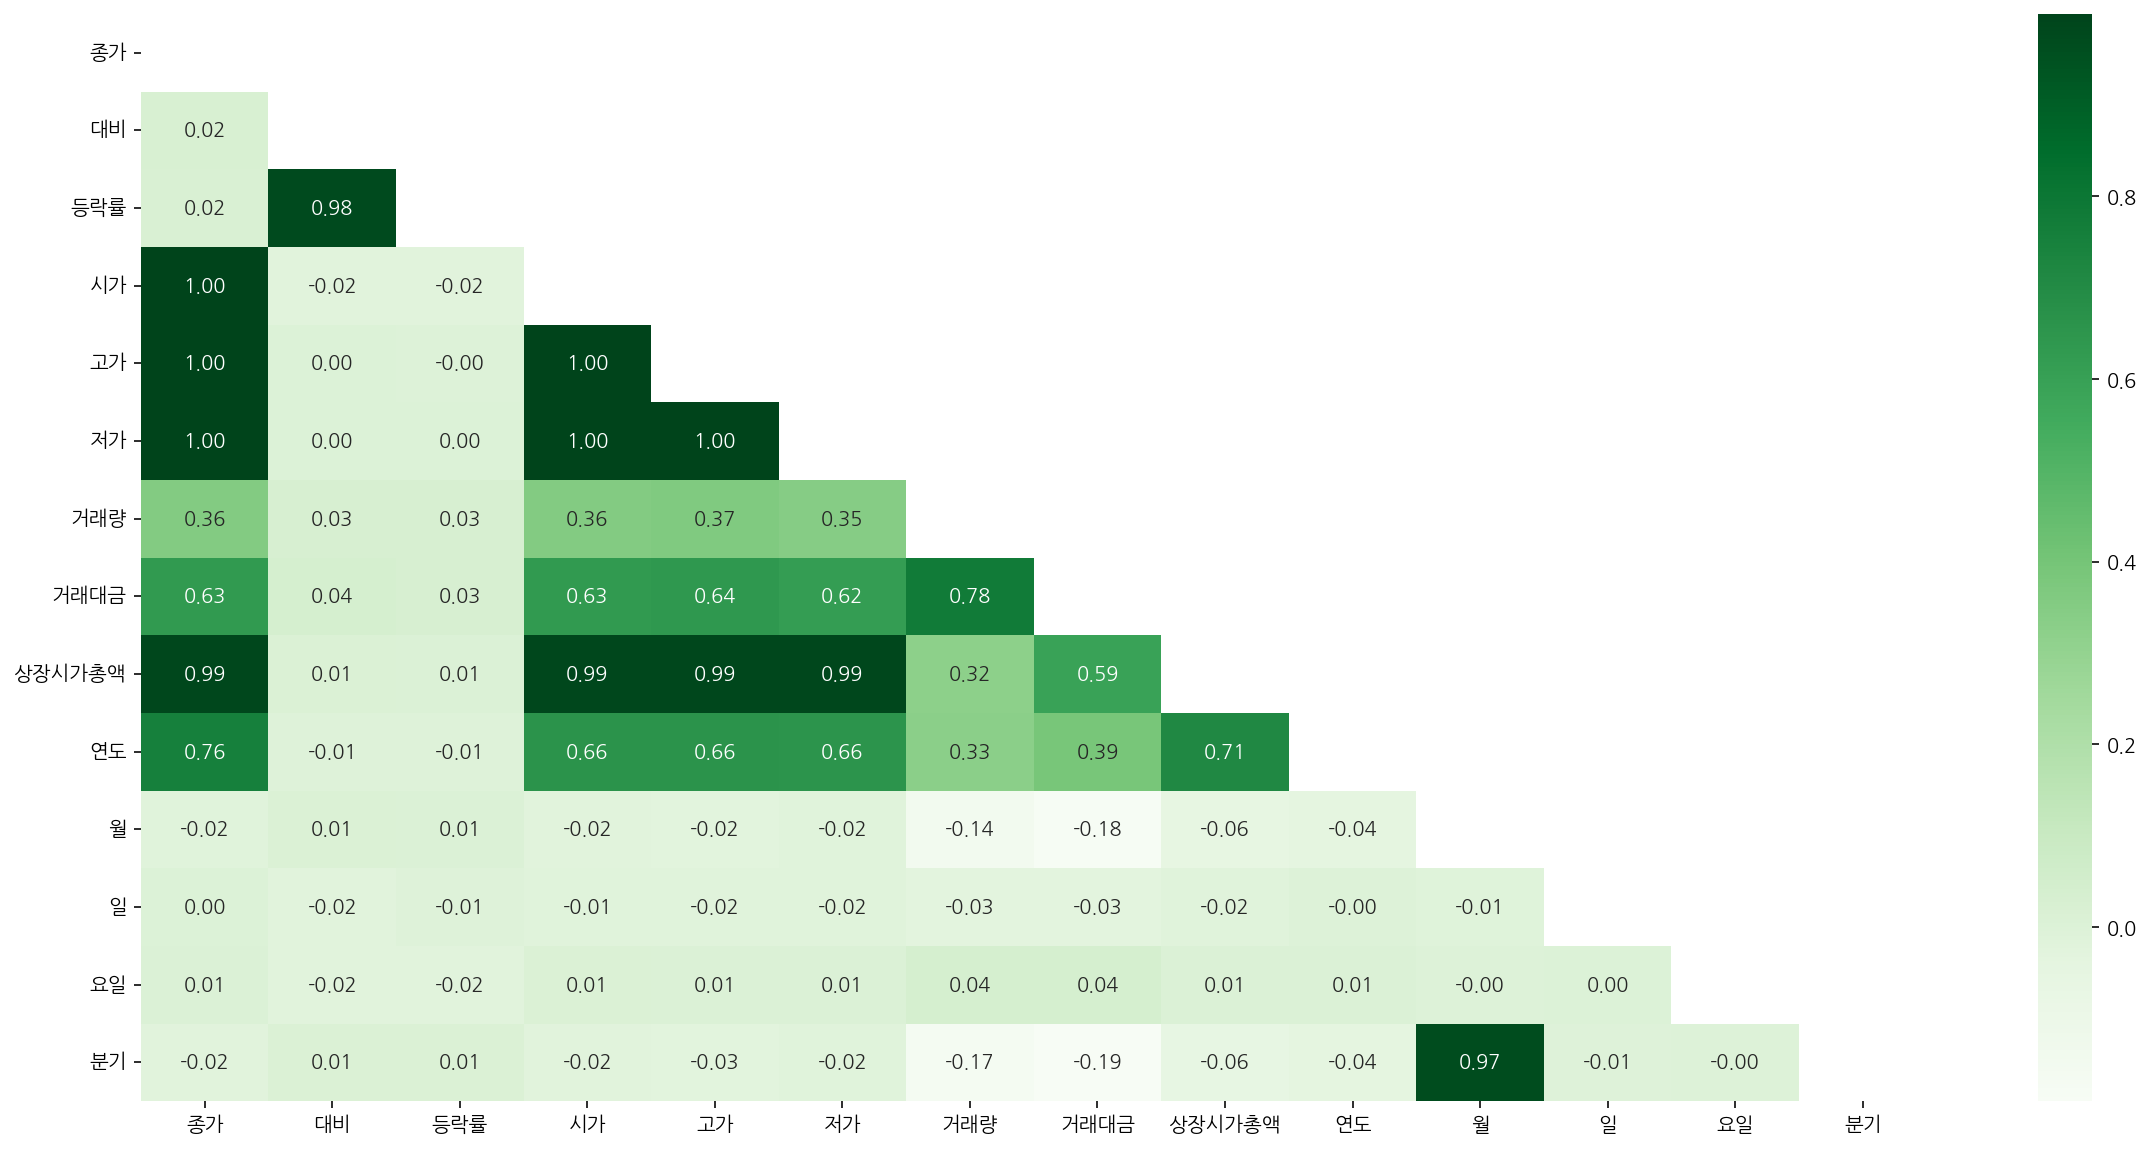

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr ,annot=True ,fmt='.2f' , cmap='Greens' ,mask=mask)

### 수치변수 히스토그램

In [ ]:
df_esg.hist(bins=100, figsize=(12, 10));

### 종가
    결측치 X

#### 전체 일자

In [ ]:
# 종가 추이
df_esg.set_index("일자")["종가"].plot(figsize=(20, 5))

#### 연도별

In [ ]:
# 연도별 종가 추이
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_esg, x="연도", y="종가", ci=None)

In [ ]:
# 연도별로 각각 월별 종가 추이
sns.relplot(data=df_esg, x="월", y="종가", col="연도", col_wrap=6, kind="line", height=3, ci=None)

In [ ]:
# 연도월별로 종가 추이

px.line(df_esg, x="연도월", y="종가", title="연도월 별 종가")

In [ ]:
df_esg.plot(x="연도월", y="종가", figsize=(20, 5))

### 거래량
    2018년 12월 24일 이전 데이터는 모두 null

#### 전체 일자

In [ ]:
df_esg["거래량"].plot(figsize=(20, 6))

#### 연도별

In [ ]:
# 결측치 0으로 대체
plt.figure(figsize=(25, 5))
sns.lineplot(data=df_esg.fillna(0), x="연도", y="거래량", ci=None)

In [ ]:
# 결측치 0으로 대체
# 연도별 보다는 조금 더 세세하게 월별 / 연도월별로 보는게 좋을 것 같다.
px.line(df_esg.fillna(0), x="연도", y="거래량", title="연도별 거래량")

#### 연도월별

In [ ]:
# 결측치가 있는 행 제거

plt.figure(figsize=(25, 5))
plt.xticks(rotation=45)     # x축 텍스트 회전
sns.lineplot(data=df_esg.dropna(), x="연도월", y="거래량", ci=None)

In [ ]:
# 결측치 0으로 대체
px.line(df_esg.fillna(0), x="연도월", y="거래량", title="연도월별 거래량")

### 등락률
    2018년 12월 24일 이전 데이터는 모두 결측치

#### 전체 일자

In [ ]:
df_esg["등락률"].plot(figsize=(20, 5))

#### 연도별

In [ ]:
# 연도별 등락률
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_esg, x="연도", y="등락률", ci=None)

#### 연도월별

In [ ]:
plt.figure(figsize=(25, 5))
plt.xticks(rotation=70, size=7)
sns.lineplot(data=df_esg, x="연도월", y="등락률", ci=None)

In [ ]:
px.line(df_esg, x='연도월', y='등락률')

# KOSPI 200 지수와 KOSPI 200 ESG 지수 병합
가져올 컬럼
* 일자
* KOSPI 200의 종가, 등락률, 거래량
* KOSPI 200 ESG의 종가, 등락률, 거래량 
* 연도, 연도월, 분기

## 데이터프레임 병합 : Merge

In [34]:
df_merge = df_kospi[['일자', '종가', '등락률', '거래량', '연도', '연도월', '분기']].merge(df_esg[['일자', '종가', '등락률', '거래량']], how='left', on='일자')
df_merge.columns = ['일자', 'KOSPI 200 종가', 'KOSPI 200 등락률', 'KOSPI 200 거래량', '연도', '연도월', '분기', 'KOSPI 200 ESG 종가', 'KOSPI 200 ESG 등락률', 'KOSPI 200 ESG 거래량']
df_merge = df_merge[['일자', 'KOSPI 200 종가', 'KOSPI 200 등락률', 'KOSPI 200 거래량', 'KOSPI 200 ESG 종가', 'KOSPI 200 ESG 등락률', 'KOSPI 200 ESG 거래량', '연도', '연도월', '분기']]
df_merge.head()

,일자,KOSPI 200 종가,KOSPI 200 등락률,KOSPI 200 거래량,KOSPI 200 ESG 종가,KOSPI 200 ESG 등락률,KOSPI 200 ESG 거래량,연도,연도월,분기
0,2011-01-03,273.81,0.97,100076,NaN,NaN,NaN,2011,2011.1,1
1,2011-01-04,275.78,0.72,113809,NaN,NaN,NaN,2011,2011.1,1
2,2011-01-05,275.35,-0.16,127214,NaN,NaN,NaN,2011,2011.1,1
3,2011-01-06,274.72,-0.23,143227,NaN,NaN,NaN,2011,2011.1,1
4,2011-01-07,275.61,0.32,113105,NaN,NaN,NaN,2011,2011.1,1


In [ ]:
df_merge.info()

## 파일로 저장

In [35]:
df_merge.to_csv("data\KOSPI_ESG_MERGE.csv", index=False)

In [36]:
pd.read_csv("data\KOSPI_ESG_MERGE.csv")

,일자,KOSPI 200 종가,KOSPI 200 등락률,KOSPI 200 거래량,KOSPI 200 ESG 종가,KOSPI 200 ESG 등락률,KOSPI 200 ESG 거래량,연도,연도월,분기
0,2011-01-03,273.81,0.97,100076,NaN,NaN,NaN,2011,2011.1,1
1,2011-01-04,275.78,0.72,113809,NaN,NaN,NaN,2011,2011.1,1
2,2011-01-05,275.35,-0.16,127214,NaN,NaN,NaN,2011,2011.1,1
3,2011-01-06,274.72,-0.23,143227,NaN,NaN,NaN,2011,2011.1,1
4,2011-01-07,275.61,0.32,113105,NaN,NaN,NaN,2011,2011.1,1
...,...,...,...,...,...,...,...,...,...,...
2890,2022-09-26,289.77,-2.68,177692,317.22,-2.65,126013.0,2022,2022.9,3
2891,2022-09-27,290.20,0.15,152310,317.50,0.09,109559.0,2022,2022.9,3
2892,2022-09-28,283.19,-2.42,160839,309.57,-2.50,110849.0,2022,2022.9,3
2893,2022-09-29,282.65,-0.19,128427,308.70,-0.28,85232.0,2022,2022.9,3


## 시각화

<AxesSubplot:title={'center':'연도월별 종가 비교'}, xlabel='연도월', ylabel='KOSPI 200 종가'>

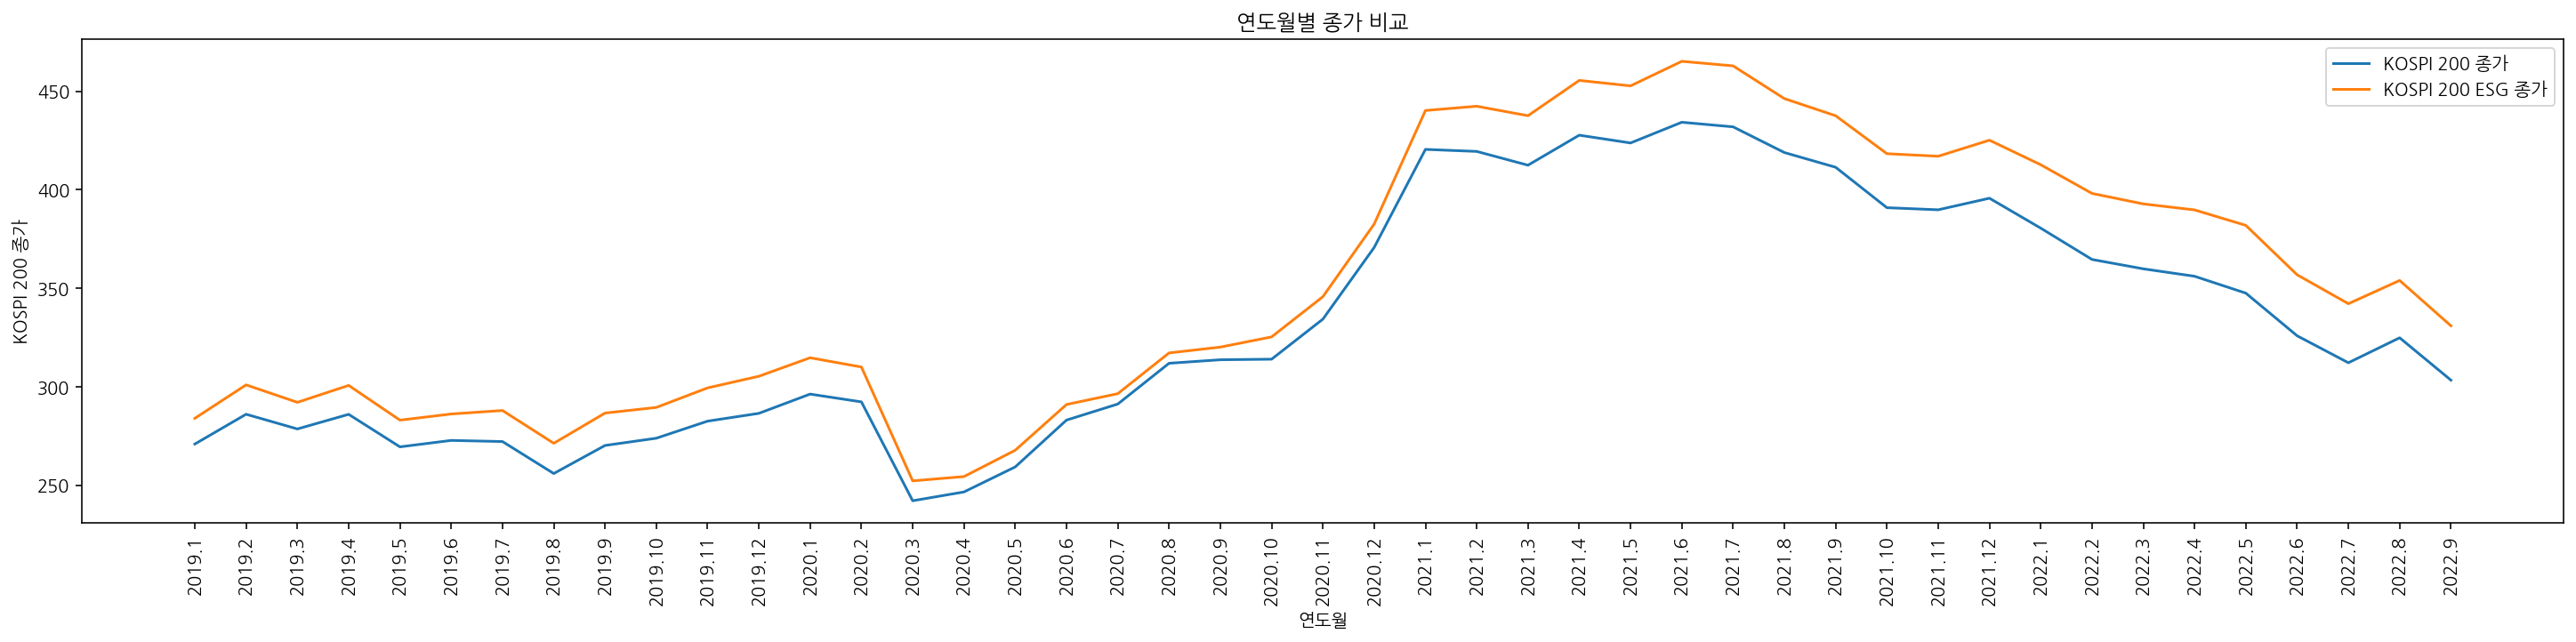

In [42]:
# 종가
plt.figure(figsize=(25, 5))
plt.title("연도월별 종가 비교")
plt.xticks(rotation=90)
sns.lineplot(data=df_merge, x="연도월", y="KOSPI 200 종가", label="KOSPI 200 종가", ci=None)
sns.lineplot(data=df_merge, x="연도월", y="KOSPI 200 ESG 종가", label="KOSPI 200 ESG 종가", ci=None)

In [ ]:
# 종가
plt.figure(figsize=(25, 5))
plt.title("연도월별 종가 비교")
plt.xticks(rotation=90)
sns.lineplot(data=df_merge[1969:], x="연도월", y="KOSPI 200 종가", label="KOSPI 200 종가", ci=None)
sns.lineplot(data=df_merge[1969:], x="연도월", y="KOSPI 200 ESG 종가", label="KOSPI 200 ESG 종가", ci=None)

In [37]:
# 등락률 정규화
kospi_max = df_kospi[df_kospi["등락률"] == df_kospi["등락률"].max()].iloc[0]["등락률"]
kospi_min = df_kospi[df_kospi["등락률"] == df_kospi["등락률"].min()].iloc[0]["등락률"]

esg_max = df_esg[df_esg["등락률"] == df_esg["등락률"].max()].iloc[0]["등락률"]
esg_min = df_esg[df_esg["등락률"] == df_esg["등락률"].min()].iloc[0]["등락률"]

df_norm = pd.concat([df_kospi["일자"], df_kospi["연도월"], (df_kospi["등락률"] - kospi_min) / (kospi_max - kospi_min), (df_esg["등락률"] - esg_min) / (esg_max - esg_min)], axis=1)
df_norm.columns = ["일자", "연도월", "코스피 등락률 정규화", "ESG 등락률 정규화"]
df_norm.head()

,일자,연도월,코스피 등락률 정규화,ESG 등락률 정규화
0,2011-01-03,2011.1,0.513674,NaN
1,2011-01-04,2011.1,0.498811,0.630760
2,2011-01-05,2011.1,0.446492,0.414747
3,2011-01-06,2011.1,0.442331,0.444124
4,2011-01-07,2011.1,0.475030,0.387097


<AxesSubplot:title={'center':'연도월별 등락률 비교'}, xlabel='연도월', ylabel='코스피 등락률 정규화'>

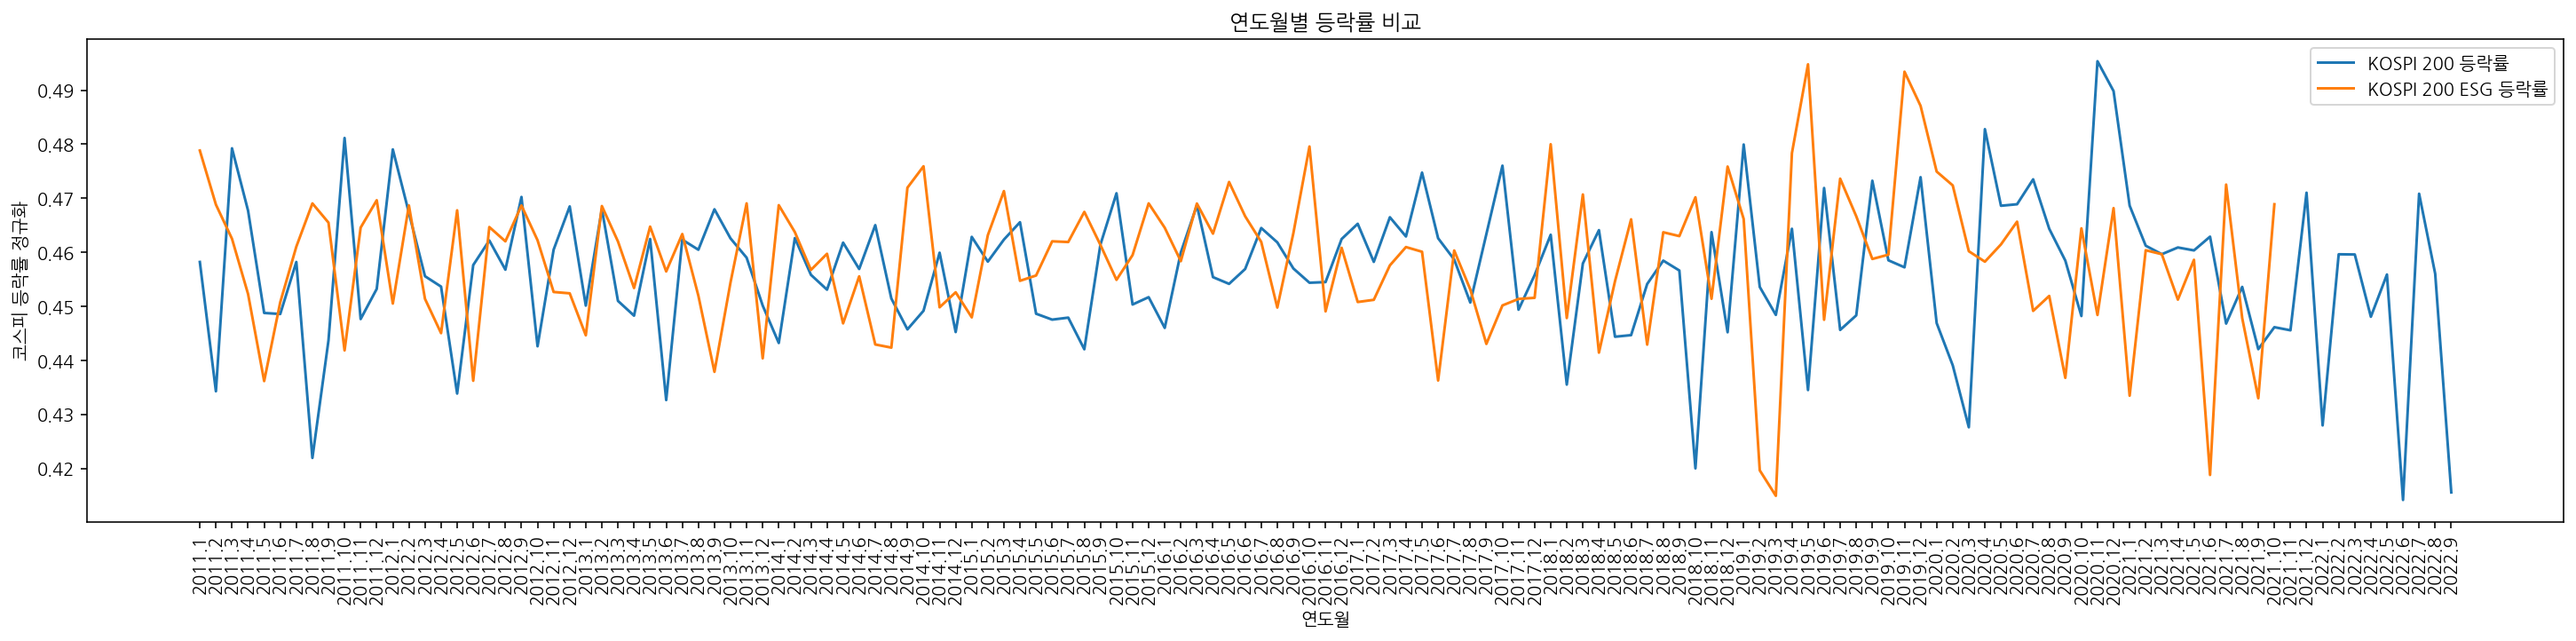

In [38]:
# 등락률

plt.figure(figsize=(25, 5))
plt.title("연도월별 등락률 비교")
plt.xticks(rotation=90)
sns.lineplot(data=df_norm, x="연도월", y="코스피 등락률 정규화", label="KOSPI 200 등락률", ci=None)
sns.lineplot(data=df_norm, x="연도월", y="ESG 등락률 정규화", label="KOSPI 200 ESG 등락률", ci=None)

In [ ]:
# 거래량
plt.figure(figsize=(25, 5))
plt.title("연도월별 거래량 비교")
plt.xticks(rotation=90)
sns.lineplot(data=df_merge, x="연도월", y="KOSPI 200 거래량", label="KOSPI 200 거래량", ci=None)
sns.lineplot(data=df_merge, x="연도월", y="KOSPI 200 ESG 거래량", label="KOSPI 200 ESG 거래량", ci=None)

In [ ]:
# 거래량
plt.figure(figsize=(25, 5))
plt.title("연도월별 거래량 비교2")
plt.xticks(rotation=70)
sns.lineplot(data=df_merge[df_merge["연도"] >= 2018], x="연도월", y="KOSPI 200 거래량", label="KOSPI 200 거래량", ci=None)
sns.lineplot(data=df_merge[df_merge["연도"] >= 2018], x="연도월", y="KOSPI 200 ESG 거래량", label="KOSPI 200 ESG 거래량", ci=None)